In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sheryanalysis as sh
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalch    303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [5]:
sh.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (303, 14)
🧱 Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

✅ No null values found

🔠 Categorical Columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']

🔢 Numerical Columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']


{'shape': (303, 14),
 'columns': ['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalch',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal',
  'num'],
 'dtypes': {'age': dtype('int64'),
  'sex': dtype('int64'),
  'cp': dtype('int64'),
  'trestbps': dtype('int64'),
  'chol': dtype('int64'),
  'fbs': dtype('int64'),
  'restecg': dtype('int64'),
  'thalch': dtype('int64'),
  'exang': dtype('int64'),
  'oldpeak': dtype('float64'),
  'slope': dtype('int64'),
  'ca': dtype('O'),
  'thal': dtype('O'),
  'num': dtype('int64')},
 'null_counts': {'age': 0,
  'sex': 0,
  'cp': 0,
  'trestbps': 0,
  'chol': 0,
  'fbs': 0,
  'restecg': 0,
  'thalch': 0,
  'exang': 0,
  'oldpeak': 0,
  'slope': 0,
  'ca': 0,
  'thal': 0,
  'num': 0},
 'total_rows': 303,
 'column_types': {'categorical': ['sex',
   'cp',
   'fbs',
   'restecg',
   'exang',
   'slope',
   'ca',
   'thal',
   'num'],
  'numerical': ['age', 'trestbps', 'chol', 'thalch', 'oldpeak'],
  'datetime': [],
  'text': 

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

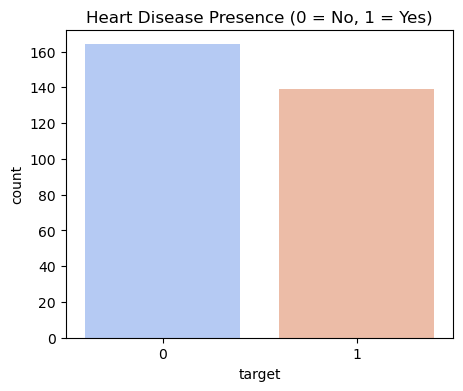

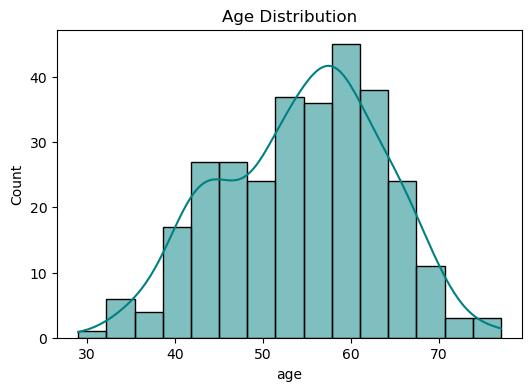

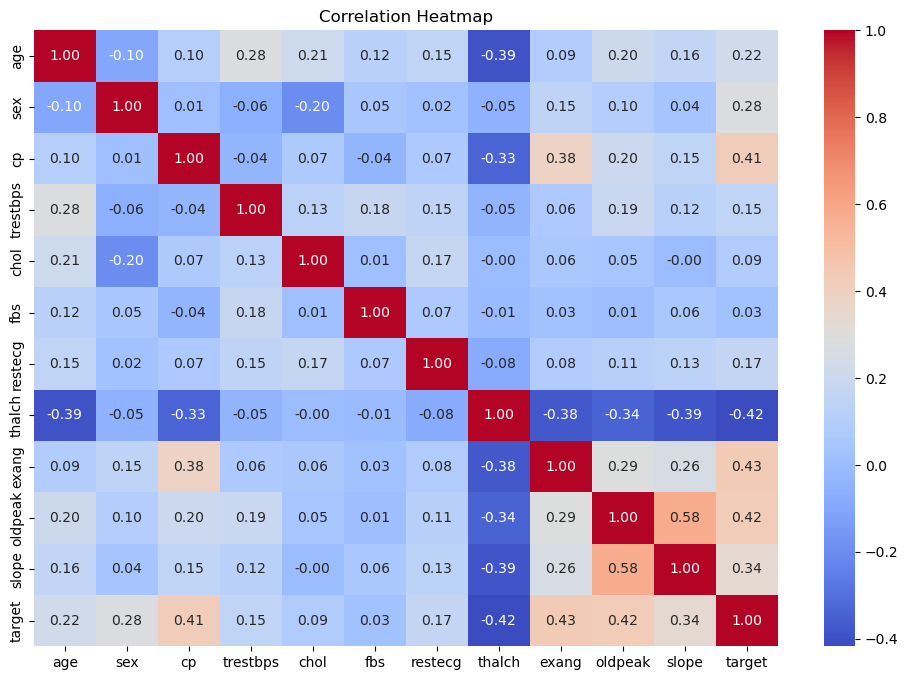

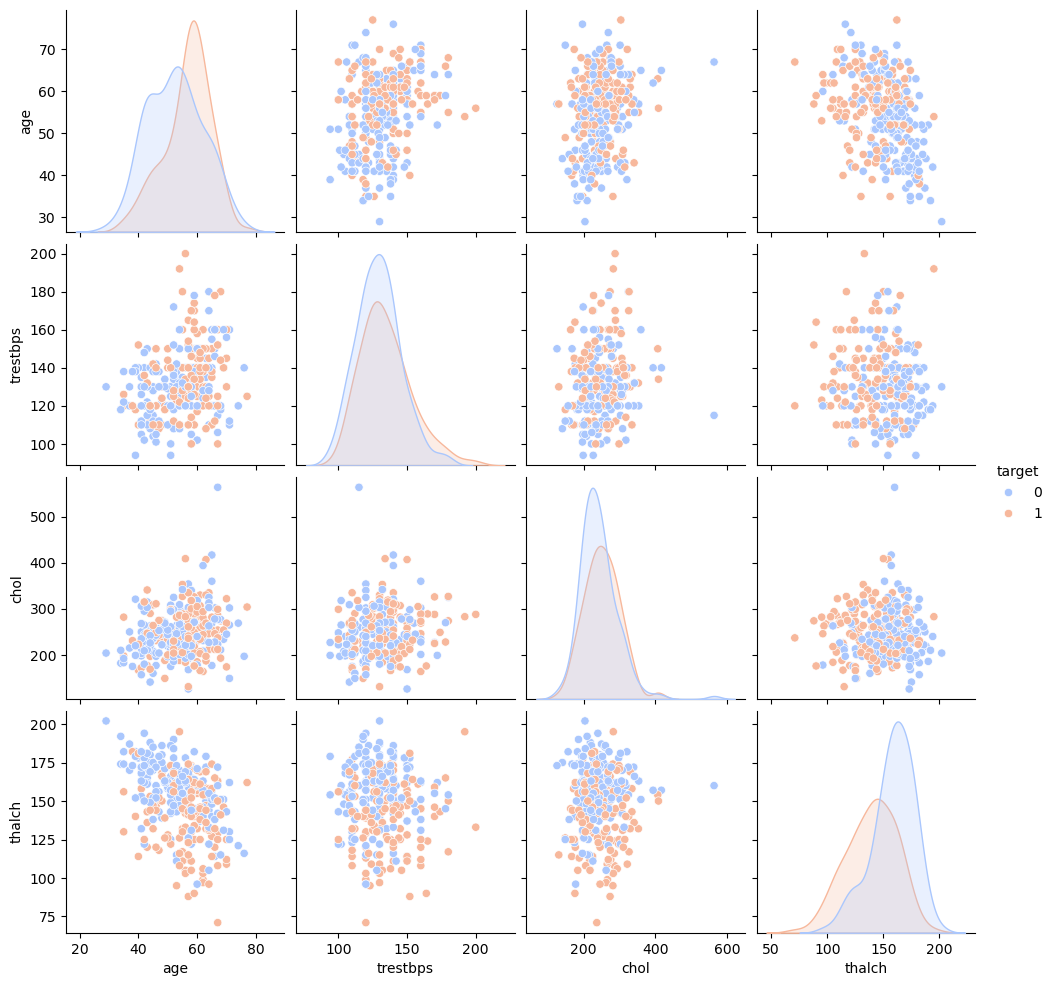

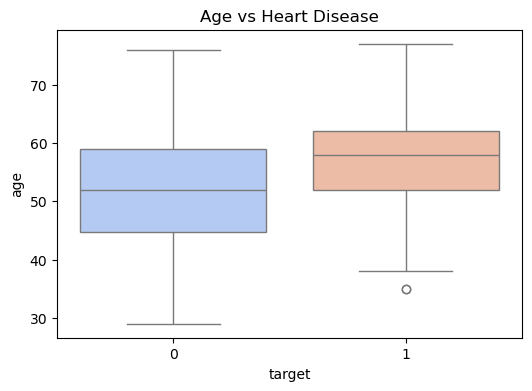

In [9]:
df.rename(columns={'num': 'target'}, inplace=True)
df['target'] = (df['target'] > 0).astype(int)
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title("Heart Disease Presence (0 = No, 1 = Yes)")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=15, kde=True, color='teal')
plt.title("Age Distribution")
plt.show()

numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(
    df[['age', 'trestbps', 'chol', 'thalch', 'target']].dropna(),
    hue='target',
    palette='coolwarm'
)
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='age', data=df, palette='coolwarm')
plt.title("Age vs Heart Disease")
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [11]:
x = df.drop('target', axis = 1)
y = df['target']

In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [32]:
numeric_column = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
cate_column = ['sex', 'cp', 'thal', 'fbs', 'restecg', 'exang', 'slope', 'ca']

scaler = StandardScaler()
OHE = OneHotEncoder(handle_unknown= 'ignore')

preprocessor = ColumnTransformer(
  transformers=[
    ('num', scaler, numeric_column),
    ('cat', OHE, cate_column)
  ]
)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [34]:
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

clf_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

clf_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

clf_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

clf_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state= 42)

In [36]:
clf_knn.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'thal', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca'])])),
                ('classifier', KNeighborsClassifier())])

In [37]:
clf_lr.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'thal', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca'])])),
                ('classifier', LogisticRegression())])

In [38]:
clf_rf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'thal', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca'])])),
                ('classifier', RandomForestClassifier())])

In [39]:
clf_nb.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'thal', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca'])])),
                ('classifier', GaussianNB())])

In [40]:
clf_svm.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'thal', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca'])])),
                ('classifier', SVC())])

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf_svm.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [42]:
y_pred = clf_lr.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [43]:
y_pred = clf_nb.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.55      0.68        29
           1       0.70      0.94      0.80        32

    accuracy                           0.75        61
   macro avg       0.79      0.74      0.74        61
weighted avg       0.79      0.75      0.74        61



In [44]:
y_pred = clf_rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [45]:
y_pred = clf_knn.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [46]:
import joblib
joblib.dump(clf_knn, 'knn_model.pkl')


['knn_model.pkl']